<a href="https://colab.research.google.com/github/kshero18/Assignments/blob/main/Machine_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install yellowbrick
!sudo apt-get update
!sudo apt-get install python3-tk
!sudo apt–fix-broken install
!pip3 install yellowbrick
!pip3 install -U yellowbrick
!pip3 install -U scikit-learn
!conda install -c districtdatalabs yellowbrick

In [71]:
import sklearn.metrics._classification
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import top_k_accuracy_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt



#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


# TODO determine the best k for k-means
# TODO calculate accuracy for best K
# TODO draw a confusion matrix

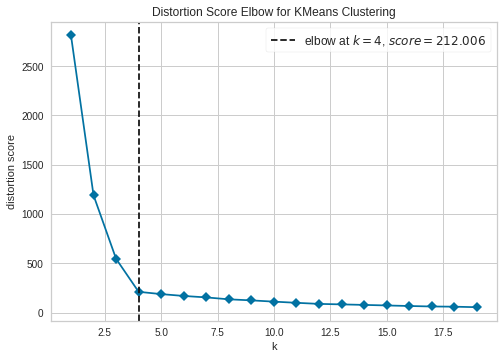

In [72]:
# TODO determine the best k for k-means

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings = False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [73]:
#y_score = np.array([[0.5, 0.2, 0.2],  # 0 is in top 2
                    #[0.3, 0.4, 0.2],  # 1 is in top 2
                    #[0.2, 0.4, 0.3],  # 2 is in top 2
                    #[0.7, 0.2, 0.1]]) # 2 isn't in top 2
#sklearn.metrics.top_k_accuracy_score(y_true, y_score, k=4, normalize=True, sample_weight=None, labels=None)

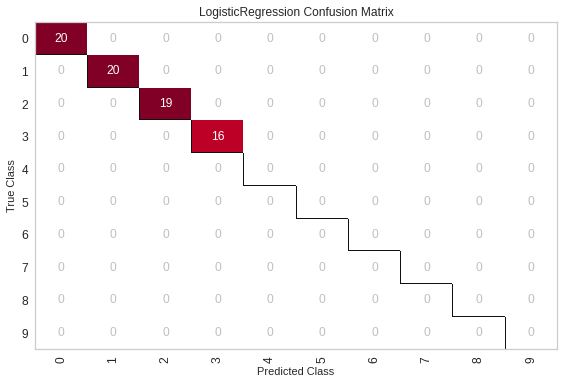

In [74]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.cluster import KMeans
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
#digits = load_digits()
#X = digits.data
#y = digits.target

#X.shape
#X = X.reshape(-1,1)
#y_true.shape
#y_true = y_true.reshape(-1,1)

X_train, X_test, y_true_train, y_true_test = tts(X, y_true, random_state=0)
model = LogisticRegression(multi_class="auto", solver="liblinear")
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted␣˓→model
cm.fit(X_train, y_true_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_true_test)
# How did we do?
cm.show()

In [ ]:
from sklearn.datasets import make_blobs

# Create dataset with 3 random cluster centers and 1000 datapoints
x, y = make_blobs(n_samples = 300, centers = 4, n_features=2, shuffle=True, random_state=31)

model = KMeans()
print(model)
visualizer = KElbowVisualizer(model, k=(1,20),timings = False)
print(visualizer)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse